In [1]:
# remove all warnings
import warnings
warnings.filterwarnings("ignore")

# import pandas & numpy library
import pandas as pd
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# read file
import os

# import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# for charts
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from collections import Counter
from itertools import chain

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# for model
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
# import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# improve resolution
%config InlineBackend.figure_format ='retina'

In [2]:
country_dat_dict = {}
count = 0
for root, dirs, files  in os.walk("youtube_data"):
    for file in files:
        if file[-3:] == "csv":
            try: 
                data = pd.read_csv(str(root+"/"+ file))
                country_dat_dict[file[:2]] = data
                data["country"] = file[:2]
                count += data.shape[0]
            except:
                continue;

In [3]:
video = pd.concat(country_dat_dict.values(),ignore_index=True)
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN


In [4]:
#video.dtypes

In [5]:
video.describe()

,category_id,views,likes,dislikes,comment_count
count,239662.000000,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,20.002950,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
std,7.271423,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,24.000000,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,24.000000,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [6]:
video["trending_date"] = video["trending_date"].apply(lambda string: pd.to_datetime(string, format = '%y.%d.%m'))

In [7]:
# Handle missing value
missing_values = video.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(f'Columns with missing value: {missing_columns}')

# Impute missing values in the description column with NaN
video['description'] = video['description'].fillna('NaN')

Columns with missing value: description    7503
dtype: int64


In [8]:
def tagstr_to_list(string:str):
    return [tag.strip('"').strip().lower() for tag in string.split("|")]
    
video["tags"] = video.tags.apply(tagstr_to_list)

In [9]:
video['tags'].iloc[0]

['sharry mann',
 'sharry mann new song',
 'sharry mann cute munda',
 'sharry mann latest song',
 'sharry mann punjabi song 2017',
 'parmish verma',
 'parmish verma new song',
 'parmish verma sharry mann',
 'parmish verma sharry mann new song',
 'parmish verma cute munda',
 'new punjabi song 2017',
 'punjabi song 2017',
 'parmish verma new song 2017',
 'parmish verma latest song 2017',
 'punjabi songs 2017']

In [10]:
video['likes_to_views'] = np.where(video['views'] > 0,
                                   video['likes'] / video['views'],
                                   np.nan)

video['trending_date'] = pd.to_datetime(video['trending_date'], errors='coerce', utc=True)
video['publish_time']   = pd.to_datetime(video['publish_time'],   errors='coerce', utc=True)

idx_last = video.groupby('video_id')['trending_date'].idxmax()
video_latest = video.loc[idx_last].copy()

video_latest['trending_dt_naive'] = video_latest['trending_date'].dt.tz_convert('UTC').dt.tz_localize(None)
video_latest['publish_dt_naive']  = video_latest['publish_time'].dt.tz_convert('UTC').dt.tz_localize(None)

video_latest['days_since_publish'] = (video_latest['trending_dt_naive'] - video_latest['publish_dt_naive']).dt.days

video_latest[['video_id','likes','views','likes_to_views','days_since_publish']].head()

,video_id,likes,views,likes_to_views,days_since_publish
37194,#NAME?,5974,1014376,0.005889,1
22921,#VALUE!,4930,206364,0.023890,2
141129,--2K8l6BWfw,694,4822,0.143924,0
118511,--45ws7CEN0,3837,309197,0.012410,-1
123769,--728h8mnDY,2573,39535,0.065082,1


In [11]:
video_latest.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes_to_views,trending_dt_naive,publish_dt_naive,days_since_publish
37194,#NAME?,2018-06-14 00:00:00+00:00,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12 05:44:19+00:00,"[comedy, action, entertainment, telugu, tollyw...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2,IN,0.005889,2018-06-14,2018-06-12 05:44:19,1
22921,#VALUE!,2018-03-21 00:00:00+00:00,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,24,2018-03-18 04:30:00+00:00,"[farzand, marathi movie farzand, marathi movie...",206364,4930,111,252,https://i.ytimg.com/vi/-G7-ryD4x4E/default.jpg,False,False,False,Watch the official teaser of upcoming Marathi ...,IN,0.023890,2018-03-21,2018-03-18 04:30:00,2
141129,--2K8l6BWfw,2018-03-06 00:00:00+00:00,La Relève #2 : Jessica Rodrigues,Georgette Mag,15,2018-03-05 13:37:34+00:00,"[jessica rodrigues, jumping, horse, cheval, po...",4822,694,4,34,https://i.ytimg.com/vi/--2K8l6BWfw/default.jpg,False,False,False,Retrouve-nous sur ➼ http://www.georgettemag.co...,FR,0.143924,2018-03-06,2018-03-05 13:37:34,0
118511,--45ws7CEN0,2018-06-12 00:00:00+00:00,PlayStation E3 2018 Showcase | English,PlayStation Europe,20,2018-06-12 03:11:18+00:00,"[playstation, playstation 4, playstation europ...",309197,3837,516,278,https://i.ytimg.com/vi/--45ws7CEN0/default.jpg,False,False,False,Show starts at 1:13:20.E3 2018 has arrived. Jo...,CA,0.012410,2018-06-12,2018-06-12 03:11:18,-1
123769,--728h8mnDY,2017-12-07 00:00:00+00:00,Rösti - YouCook,YouCook Cuisine,26,2017-12-05 16:30:00+00:00,"[youcook, cuisine, recette, europe de l'ouest,...",39535,2573,51,269,https://i.ytimg.com/vi/--728h8mnDY/default.jpg,False,False,False,Les meilleures choses dans la vie sont les plu...,FR,0.065082,2017-12-07,2017-12-05 16:30:00,1


# features

In [12]:
# likes_to_views median
median_ratio = video_latest['likes_to_views'].median()

# create a binary classification target variable
video_latest['above_median_engagement'] = (video_latest['likes_to_views'] > median_ratio).astype(int)

In [13]:
features = [
    'comment_count', 'days_since_publish',
    'category_id', 'comments_disabled', 'ratings_disabled',
    'video_error_or_removed'
]

X = video_latest[features]
y = video_latest['above_median_engagement']

In [14]:
X = X.fillna(0)

## EDA

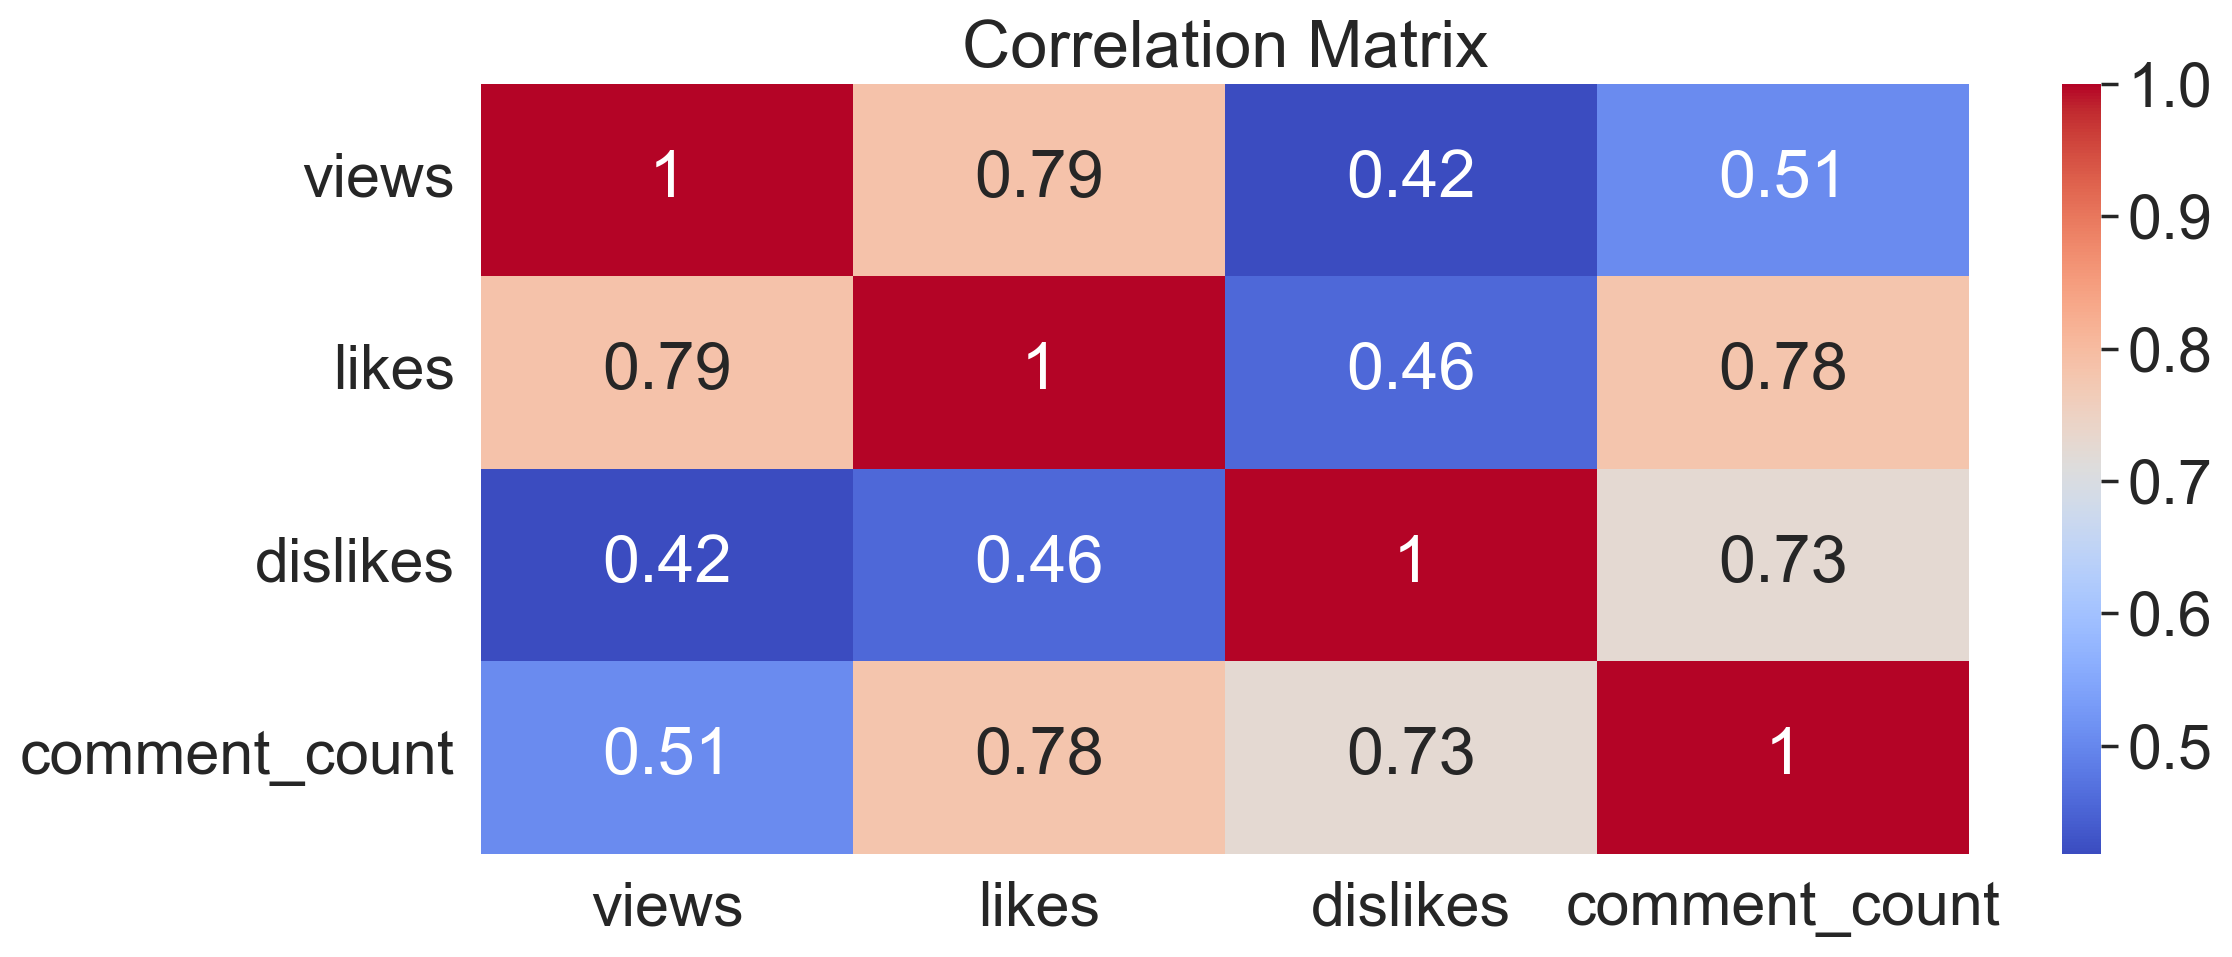

In [15]:
correlation = video[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

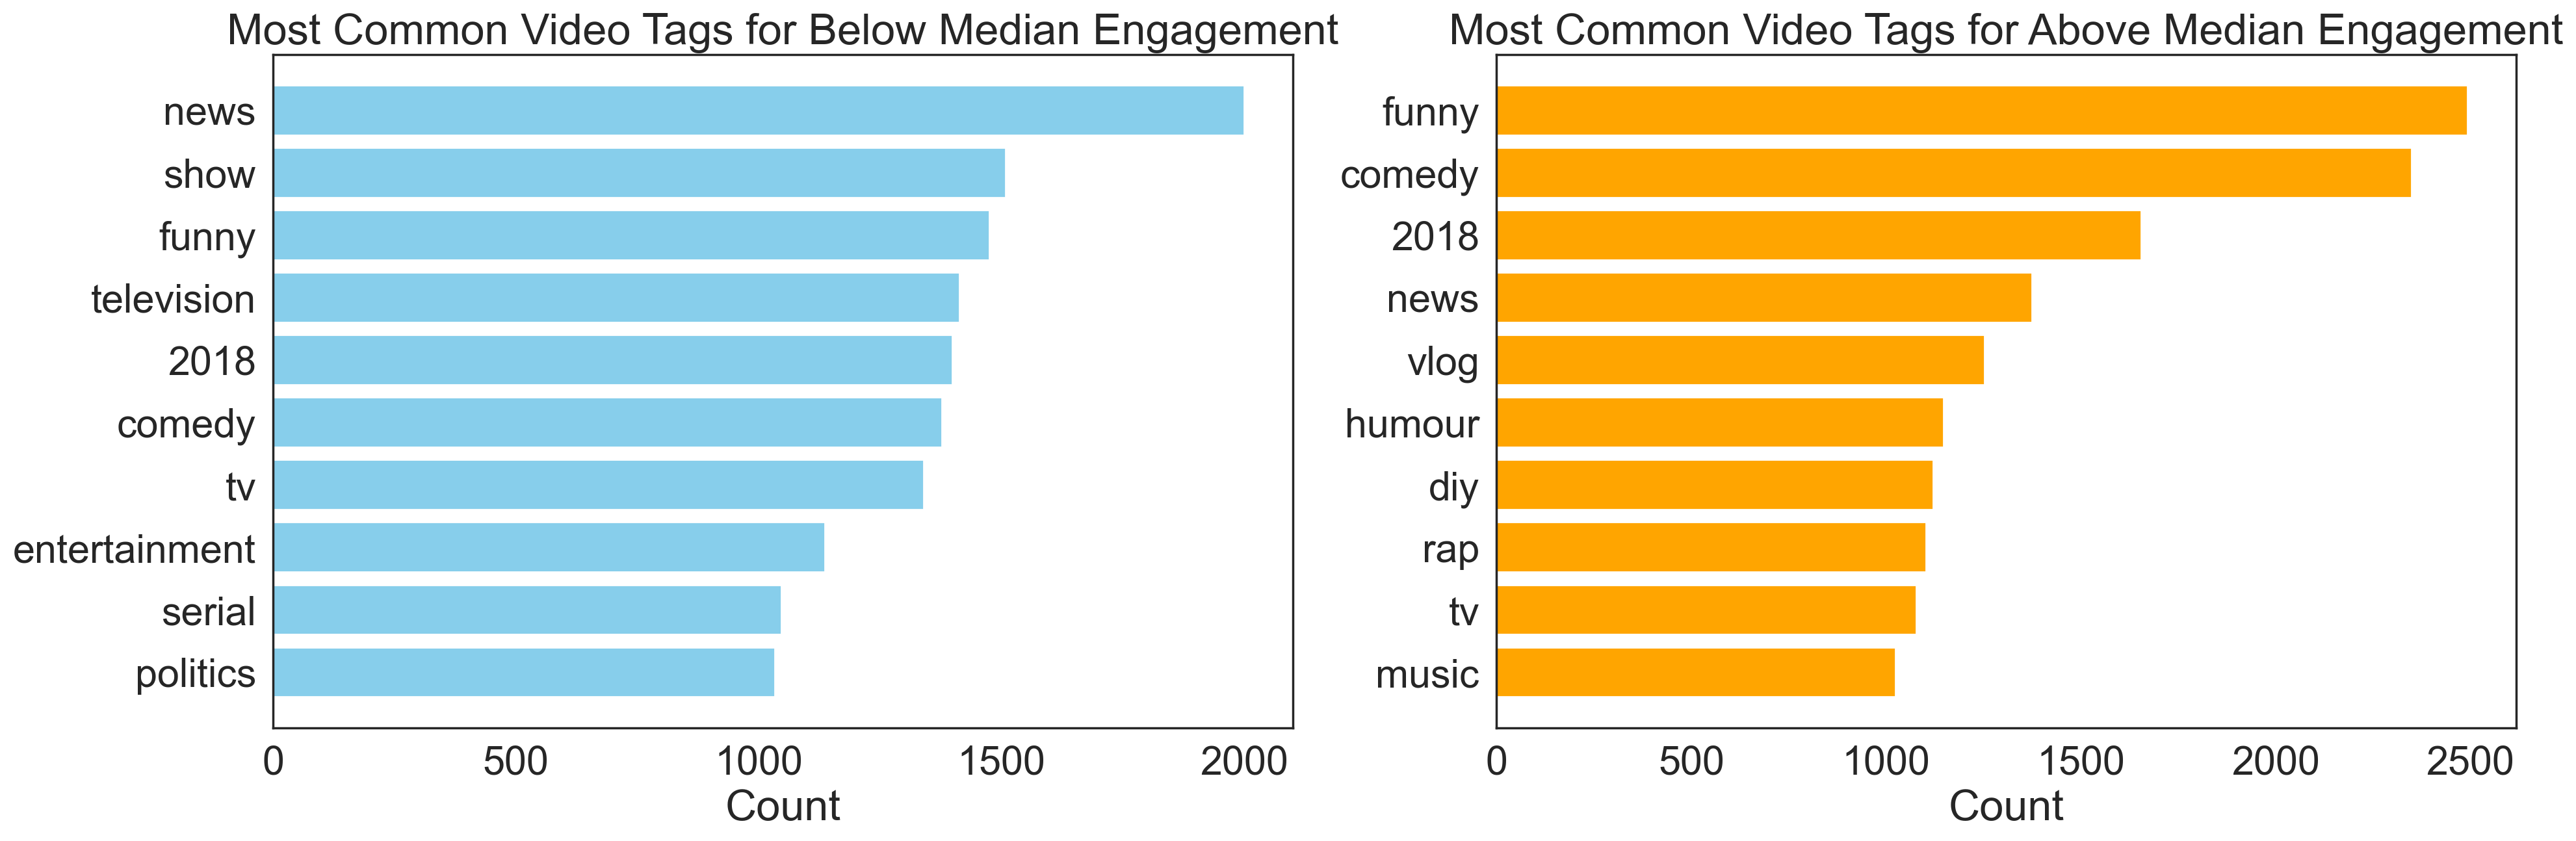

In [16]:
# Separate by engagement
above = video_latest[video_latest['above_median_engagement'] == 1]['tags']
below = video_latest[video_latest['above_median_engagement'] == 0]['tags']

# Remove 'none'
def remove_none(tags):
    return [t for t in tags if t.lower() != '[none]']

tags_above = list(chain.from_iterable(remove_none(tags) for tags in above))
tags_below = list(chain.from_iterable(remove_none(tags) for tags in below))

top_n = 10
common_above = Counter(tags_above).most_common(top_n)
common_below = Counter(tags_below).most_common(top_n)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].barh([t[0] for t in reversed(common_below)], [t[1] for t in reversed(common_below)], color='skyblue')
axes[0].set_title('Most Common Video Tags for Below Median Engagement')
axes[0].set_xlabel('Count')
axes[1].barh([t[0] for t in reversed(common_above)], [t[1] for t in reversed(common_above)], color='orange')
axes[1].set_title('Most Common Video Tags for Above Median Engagement')
axes[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Model 1 - Logistic Regression

In [18]:
baseline_features = [
    "comment_count", 
    "days_since_publish",
    "category_id",
    "comments_disabled",
    "ratings_disabled",
    "video_error_or_removed"
]

X_baseline = video_latest[baseline_features]
y = video_latest["above_median_engagement"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_baseline, y, test_size=0.2, random_state=42, stratify=y
)

baseline_logreg = LogisticRegression(max_iter=1000)
baseline_cv = cross_val_score(
    baseline_logreg,
    X_baseline,
    y,
    cv=5,
    scoring="accuracy"
)

print("Baseline CV Accuracy (mean):", baseline_cv.mean())
print("Baseline CV Accuracy (std):", baseline_cv.std())

# Fit on train
baseline_logreg.fit(Xb_train, yb_train)

# Predict on test
y_base_pred = baseline_logreg.predict(Xb_test)
y_base_proba = baseline_logreg.predict_proba(Xb_test)[:, 1]

# Metrics
baseline_test_acc = accuracy_score(yb_test, y_base_pred)
baseline_test_auc = roc_auc_score(yb_test, y_base_proba)

print("Baseline Test Accuracy:", baseline_test_acc)
print("Baseline Test ROC-AUC:", baseline_test_auc)

Baseline CV Accuracy (mean): 0.5952642839063466
Baseline CV Accuracy (std): 0.007355663053861149
Baseline Test Accuracy: 0.6039783001808319
Baseline Test ROC-AUC: 0.6522408241315697


## Variant 1 - Standardized Logistic Regression

In [19]:
features = ['comment_count', 'days_since_publish', 'category_id', 'country']
X = video_latest[features]
y = video_latest['above_median_engagement'].astype(int)

num_cols = ['comment_count', 'days_since_publish']
cat_cols = ['category_id', 'country']

# Preprocessing
numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])

# Model pipeline

log_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        max_iter=2000,            
        class_weight='balanced',  
        solver='liblinear',       
        random_state=42  
    ))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Fit model
log_reg.fit(X_train, y_train)

# Evaluate
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

[[8039 1362]
 [4401 5000]]
              precision    recall  f1-score   support

           0      0.646     0.855     0.736      9401
           1      0.786     0.532     0.634      9401

    accuracy                          0.693     18802
   macro avg      0.716     0.693     0.685     18802
weighted avg      0.716     0.693     0.685     18802

AUC: 0.7653948088750377


In [20]:
from sklearn.model_selection import cross_val_score

# 5-fold CV accuracy for Variant 1
cv_scores_v1 = cross_val_score(
    log_reg,
    X,
    y,
    cv=5, 
    scoring='accuracy'
)

print("Variant 1 CV Accuracy:", cv_scores_v1.mean())
print("CV Scores by Fold:", cv_scores_v1)

Variant 1 CV Accuracy: 0.6896400982321739
CV Scores by Fold: [0.68907563 0.69349005 0.68411255 0.68820807 0.69331419]


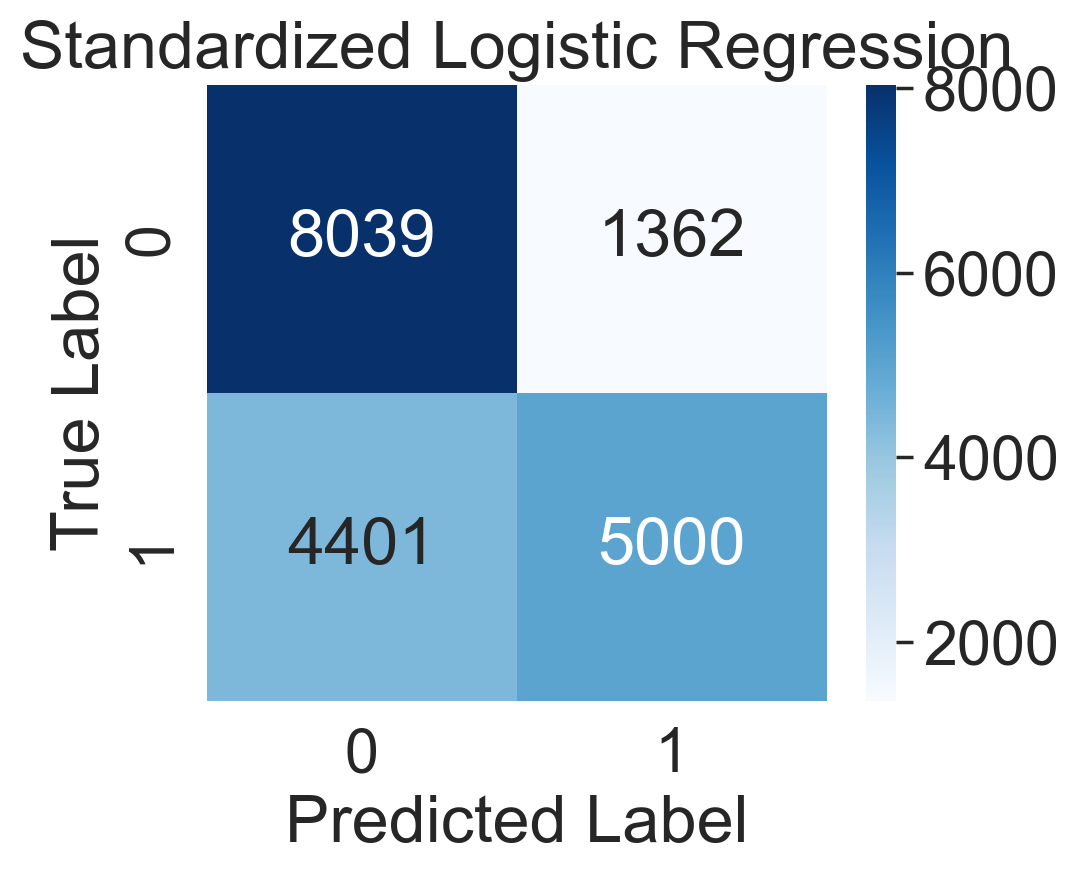

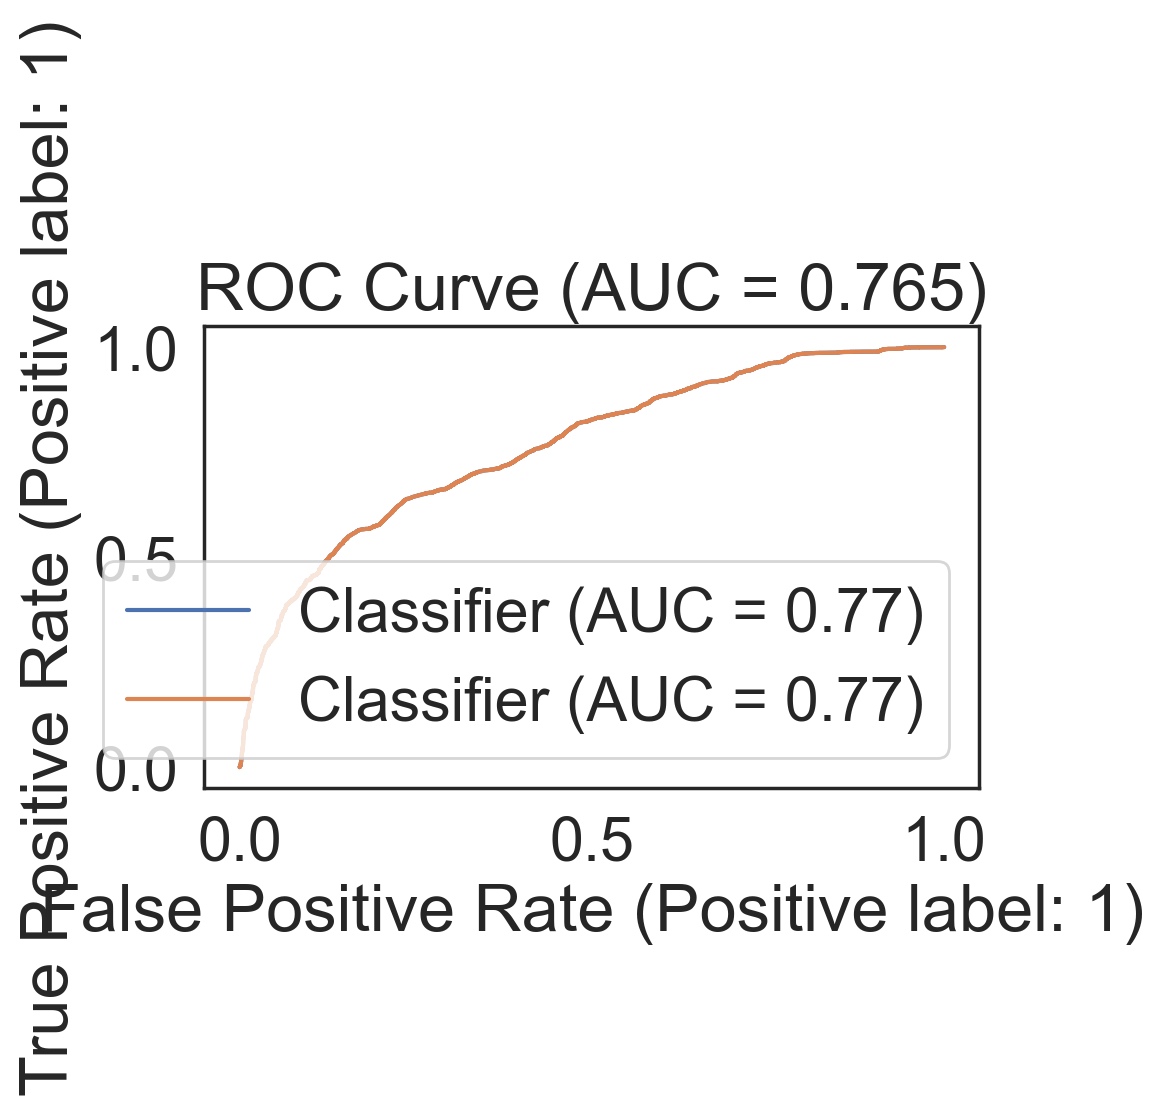

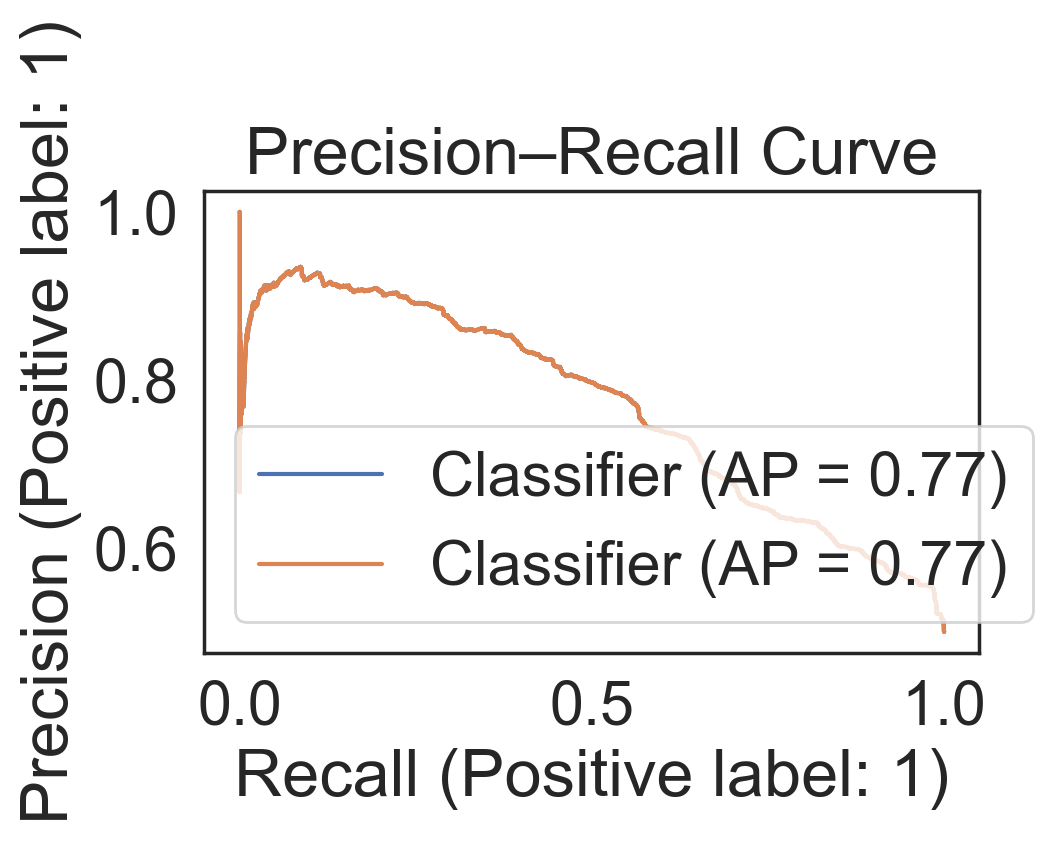

In [21]:
# --- Confusion Matrix Heatmap ---
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
ax.set_title('Standardized Logistic Regression')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

# --- ROC Curve ---
fig, ax = plt.subplots(figsize=(5, 3))
roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_prob, ax=ax)
roc_disp.plot(ax=ax)
plt.title('ROC Curve (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.show()

# --- Precision–Recall Curve ---
fig, ax = plt.subplots(figsize=(5, 3))
pr_disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, ax=ax)
pr_disp.plot(ax=ax)
plt.title('Precision–Recall Curve')
plt.show()

In [22]:
model = log_reg.named_steps['model']
feature_names = (num_cols + list(log_reg.named_steps['preprocess']
                                 .transformers_[1][1]
                                 .get_feature_names_out(cat_cols)))
coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0])
}).sort_values('Odds_Ratio', ascending=False)
print(coefs)

               Feature  Coefficient  Odds_Ratio
13      category_id_27     2.340062   10.381881
12      category_id_26     2.247528    9.464314
4       category_id_15     2.062146    7.862827
14      category_id_28     2.025663    7.581136
7       category_id_20     1.851126    6.366983
9       category_id_23     1.511439    4.533251
6       category_id_19     1.393898    4.030532
2        category_id_2     1.290611    3.635009
3       category_id_10     1.270012    3.560895
0        comment_count     1.038859    2.825991
15      category_id_29     0.741005    2.098042
20          country_FR     0.383535    1.467462
19          country_DE     0.301413    1.351768
10      category_id_24     0.137498    1.147400
21          country_GB     0.010413    1.010467
8       category_id_22    -0.014926    0.985185
23          country_US    -0.052299    0.949045
5       category_id_17    -0.198219    0.820190
18      category_id_44    -0.305942    0.736429
11      category_id_25    -0.528887    0

## Variant 2 - Penalized Logistic Regression (L1 / L2)

In [23]:
# V1
log_reg_v1 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        solver='liblinear'
    ))
])
log_reg_v1.fit(X_train, y_train)

# variant: L1 penalty
log_reg_v2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        penalty='l1',   
        max_iter=2000,
        class_weight='balanced',
        solver='liblinear' 
    ))
])
log_reg_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['comment_count',
                                                   'days_since_publish']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category_id',
                                                   'country'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    penalty='l1', solver='liblinear'))])

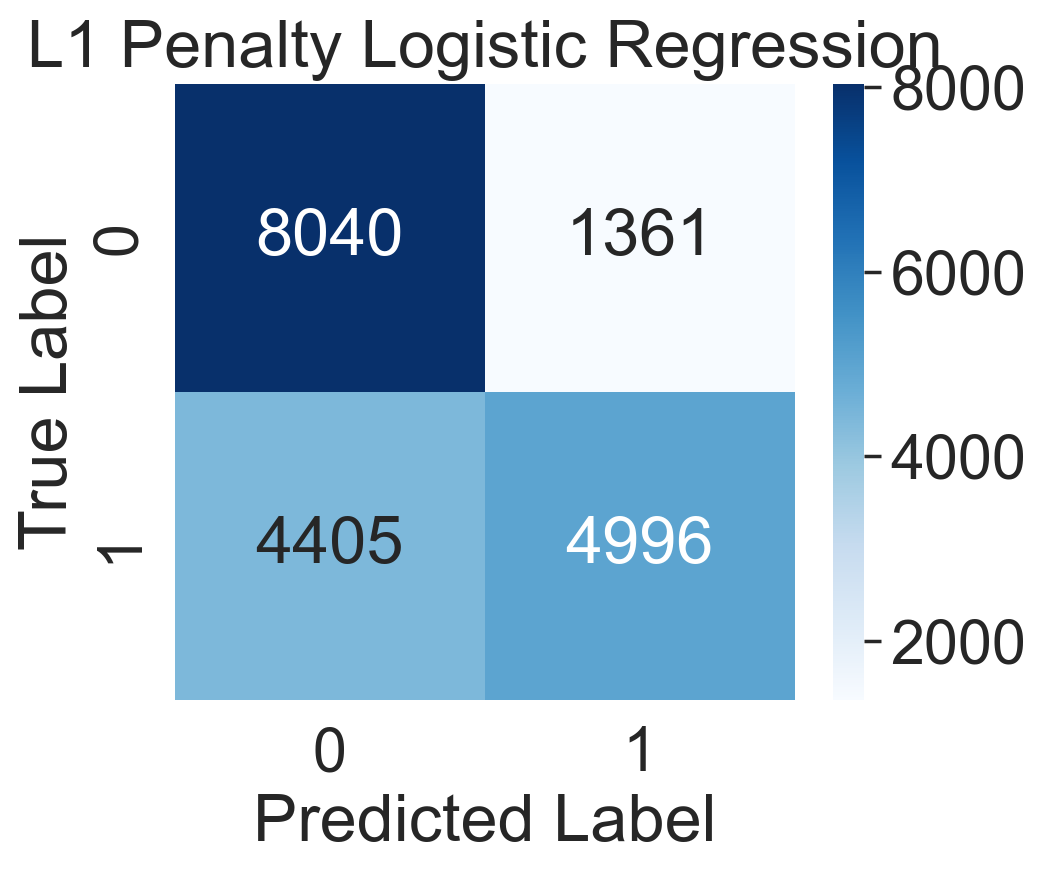

In [24]:
y2_pred = log_reg_v2.predict(X_test)

cm_v2 = confusion_matrix(y_test, y2_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues')
plt.title("L1 Penalty Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
cv_v1 = cross_val_score(log_reg_v1, X, y, cv=5, scoring='accuracy')
cv_v2 = cross_val_score(log_reg_v2, X, y, cv=5, scoring='accuracy')

print("Variant 1 CV Accuracy:", cv_v1.mean())
print("Variant 2 CV Accuracy (L1):", cv_v2.mean())

Variant 1 CV Accuracy: 0.6896400982321739
Variant 2 CV Accuracy (L1): 0.6895656369368082


## Variant 3 - Numeric-Only Logistic Regression

In [26]:
df = video_latest.copy()
y = df['above_median_engagement'].astype(int)

num_cols_v3 = ['comment_count', 'days_since_publish']  # only numeric
X_v3 = df[num_cols_v3]

numeric_pipe_v3 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor_v3 = ColumnTransformer([
    ('num', numeric_pipe_v3, num_cols_v3)])

logit_v3 = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    solver='liblinear',
    random_state=42)

clf_v3 = Pipeline([
    ('prep', preprocessor_v3),
    ('model', logit_v3)])

# train/test split (same as other variants)
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_v3, y, test_size=0.2, stratify=y, random_state=42)

# --- Fit & CV accuracy (5-fold) ---
cv_scores_v3 = cross_val_score(
    clf_v3, X3_train, y3_train,
    cv=5, scoring='accuracy'
)
v3_cv_acc = cv_scores_v3.mean()
print("Variant 3 (Numeric-only, scaled) CV accuracy:", v3_cv_acc)

clf_v3.fit(X3_train, y3_train)

# --- Test ROC-AUC ---
y3_proba = clf_v3.predict_proba(X3_test)[:, 1]
print("Variant 3 Test ROC-AUC:", roc_auc_score(y3_test, y3_proba))

Variant 3 (Numeric-only, scaled) CV accuracy: 0.5897347250847683
Variant 3 Test ROC-AUC: 0.6895478645382391


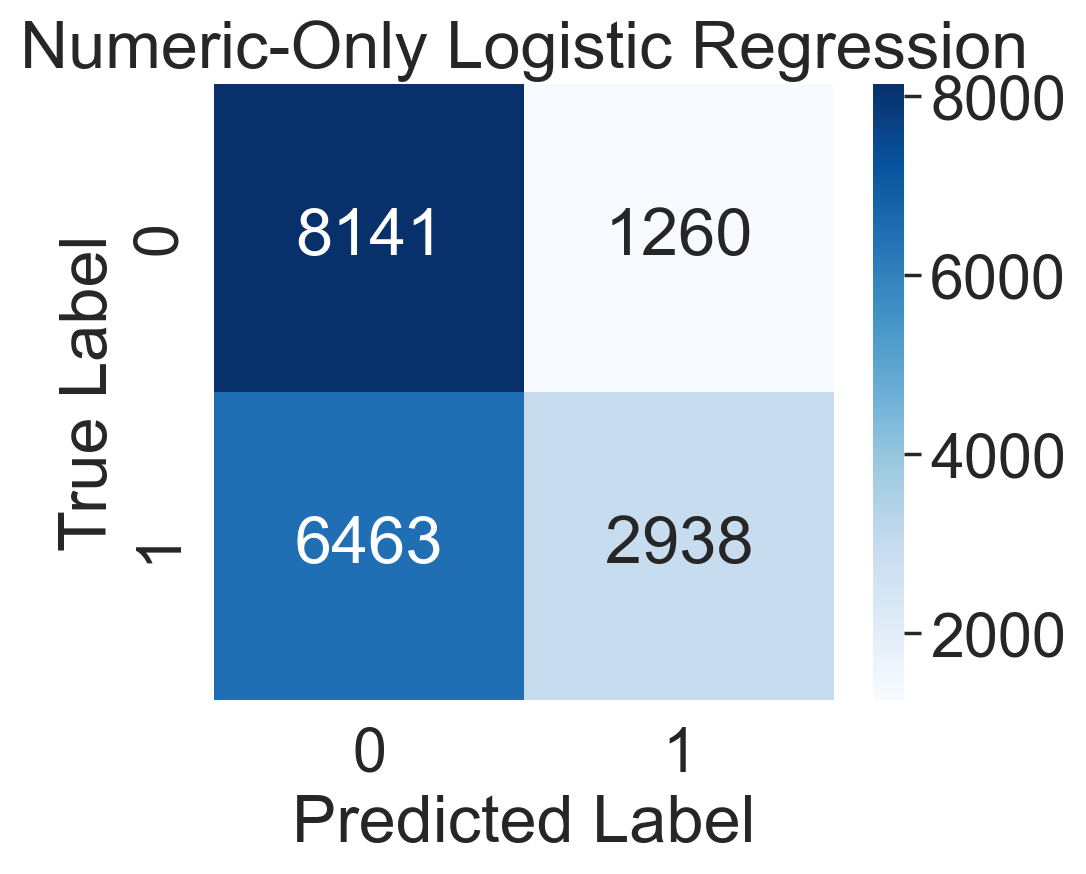

Variant 2 (L1) Test ROC-AUC: 0.765376523947185


<Figure size 600x500 with 0 Axes>

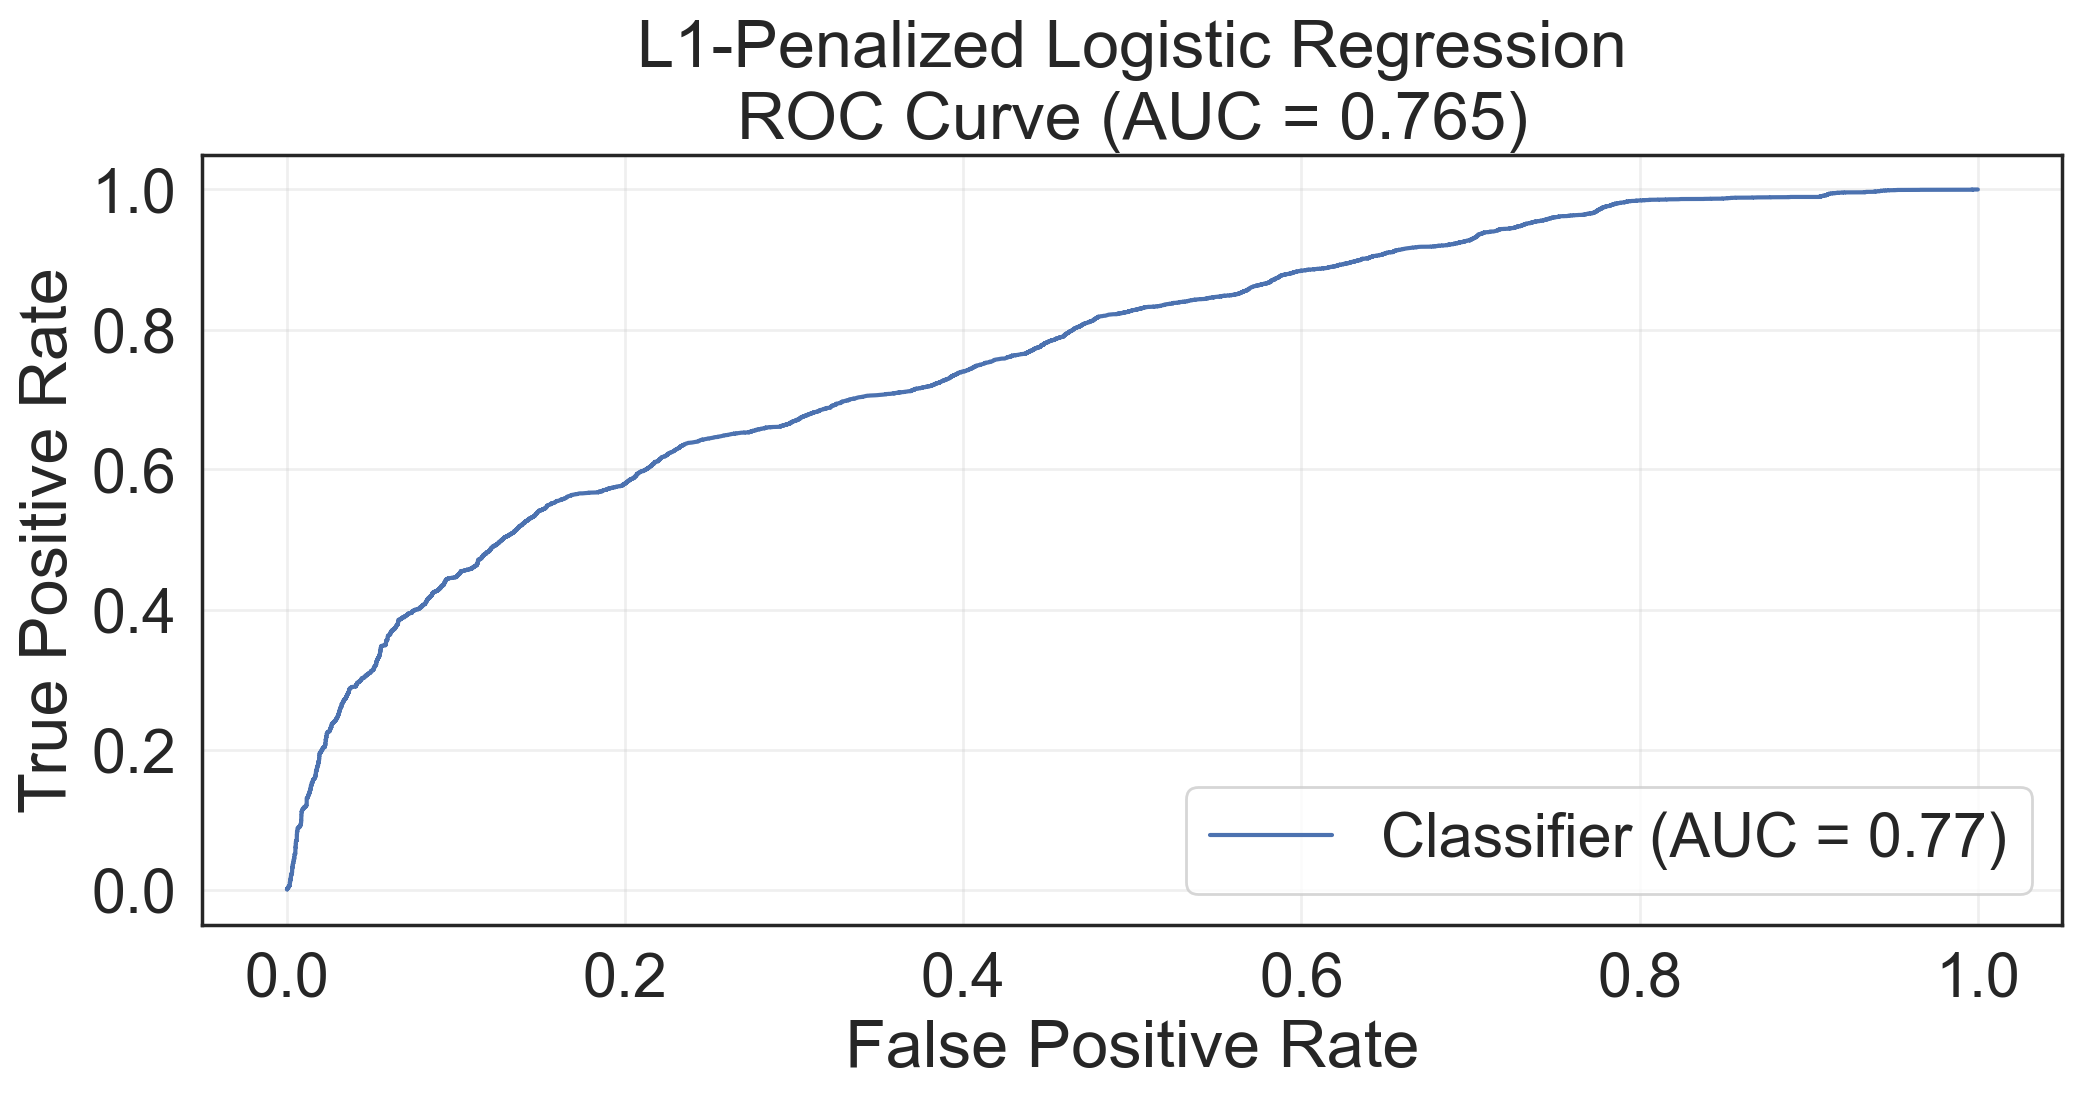

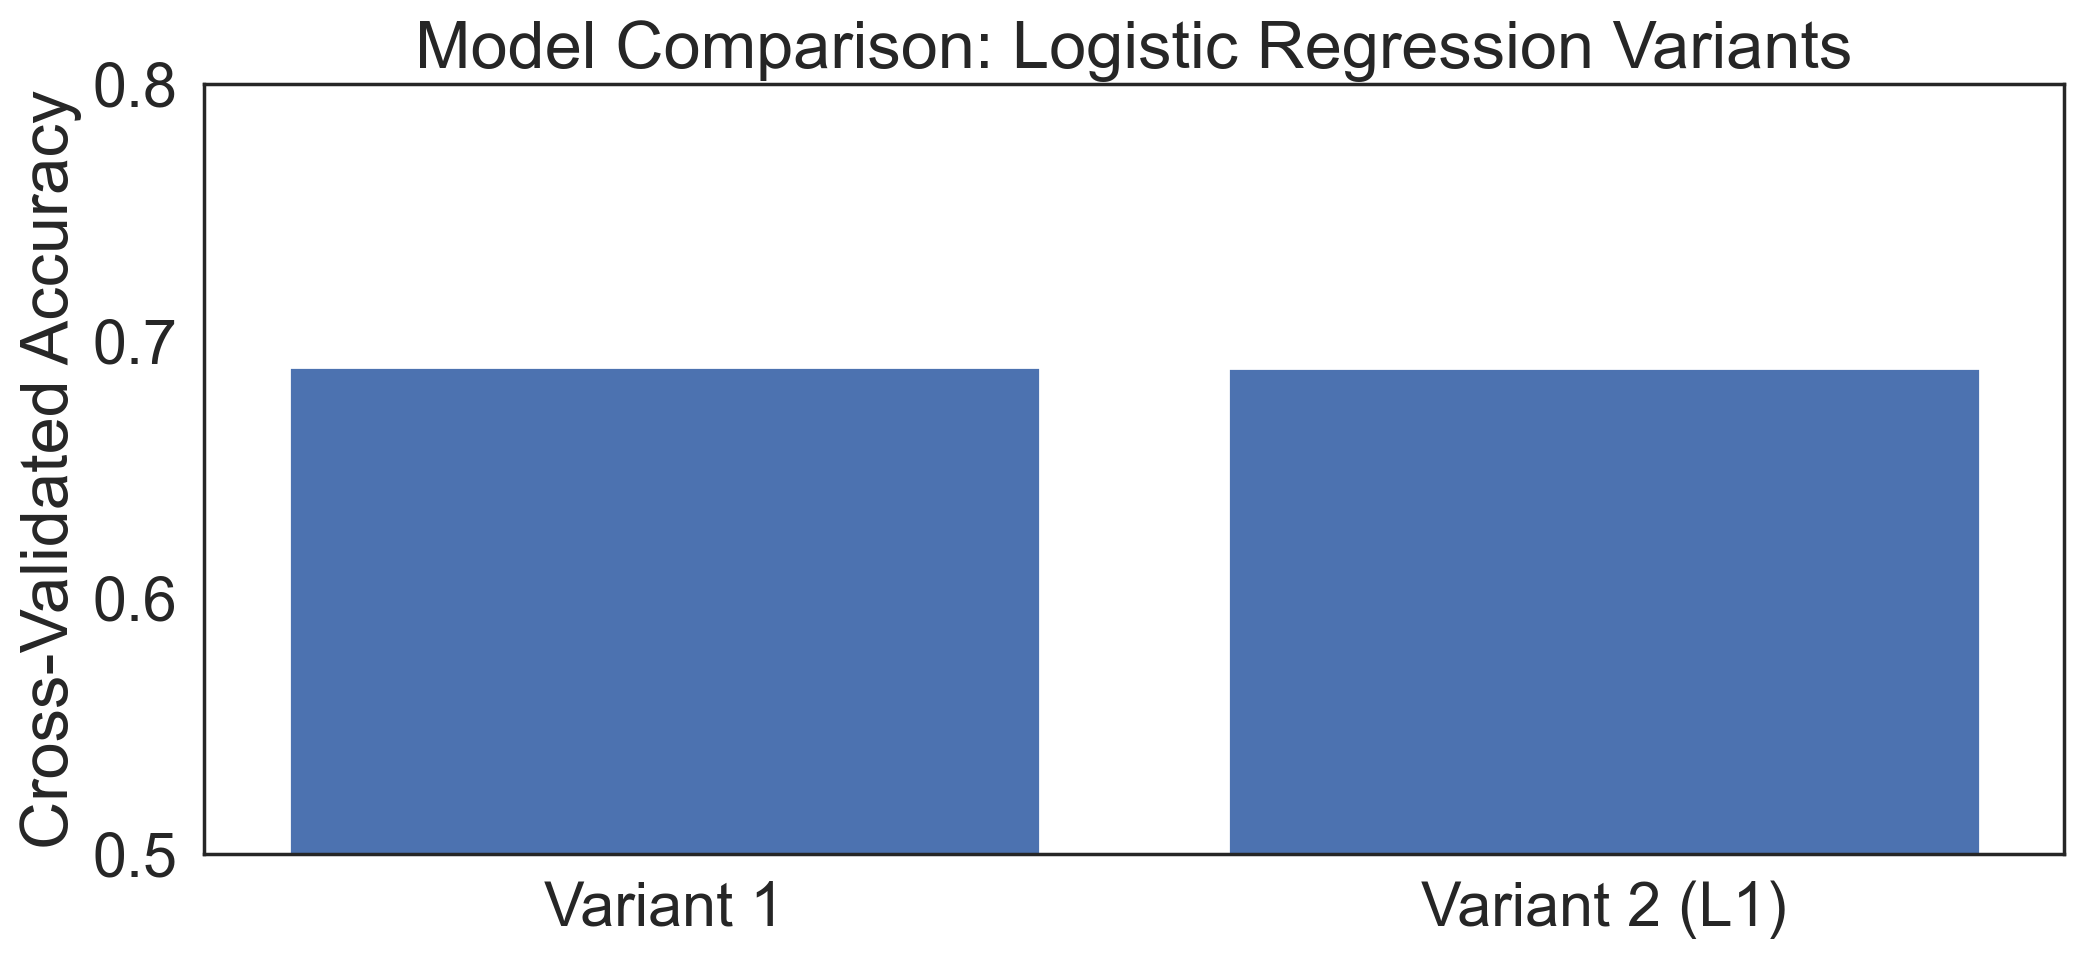

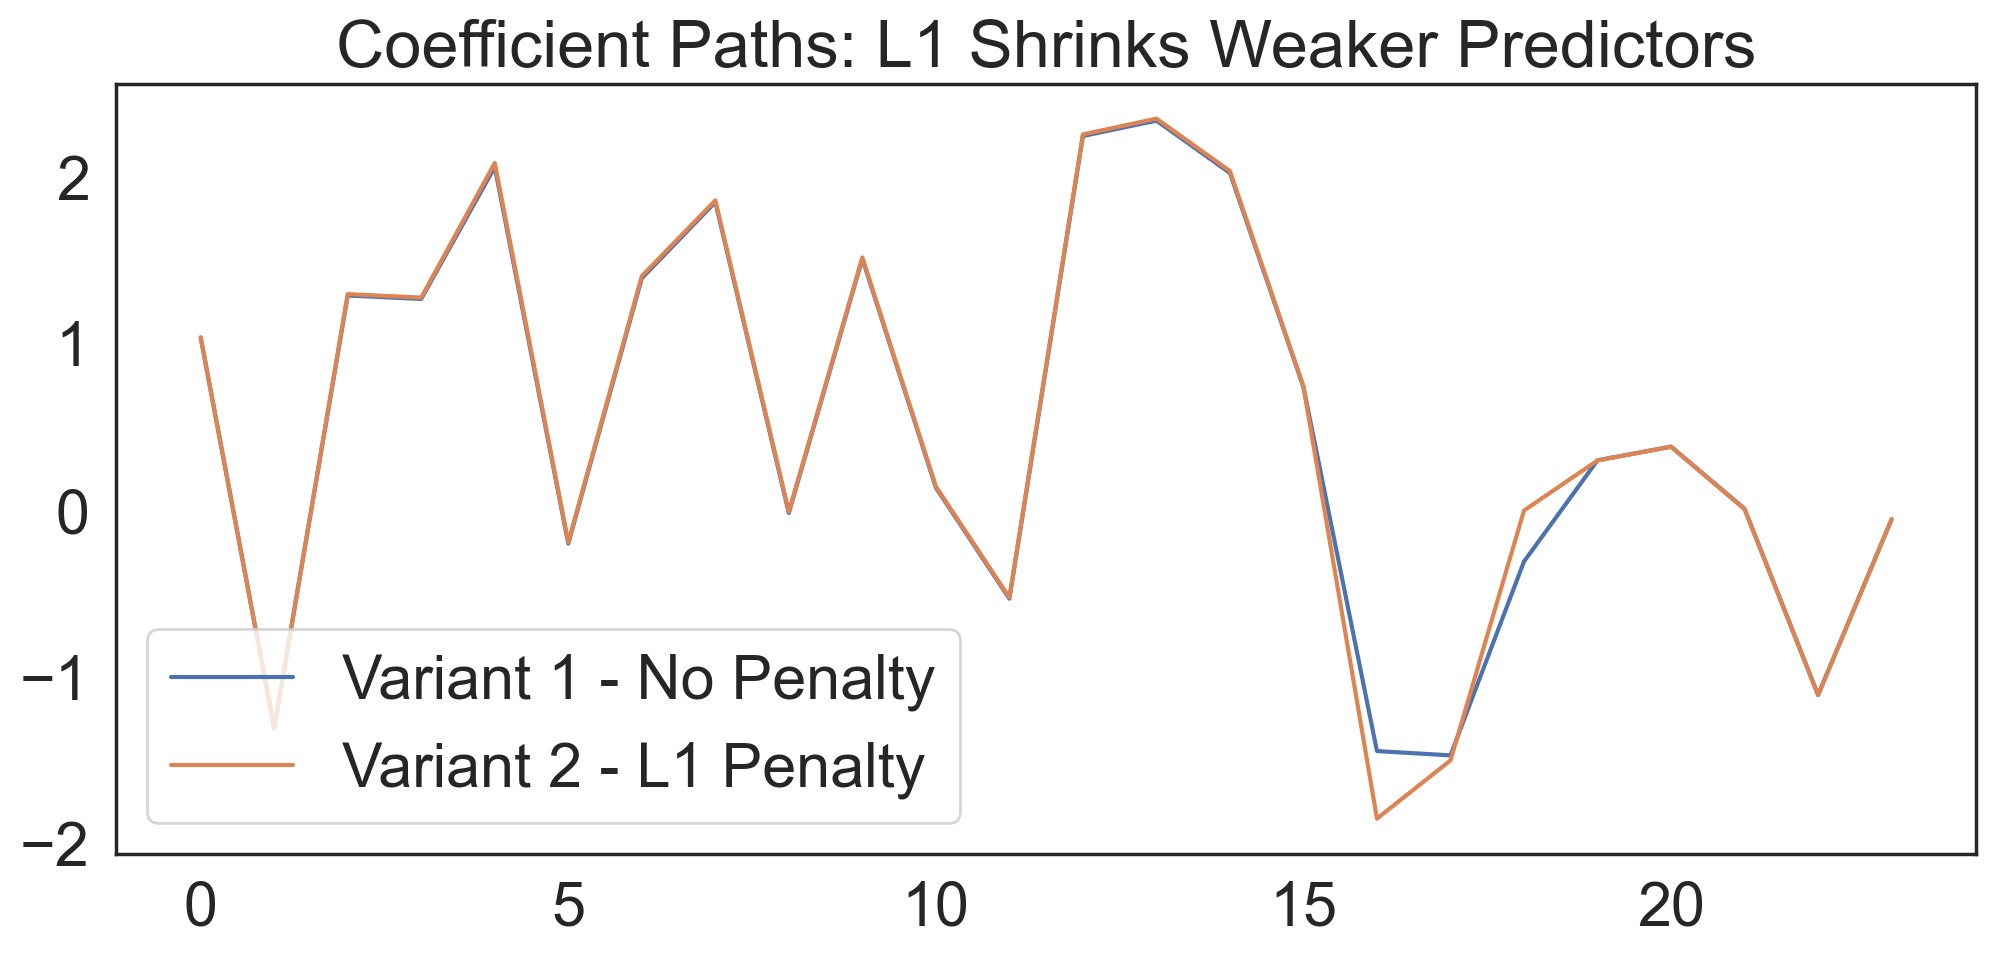

In [27]:
y3_pred = clf_v3.predict(X3_test)
cm_v3 = confusion_matrix(y3_test, y3_pred)

# --- Heatmap Plot ---
plt.figure(figsize=(5,4))
sns.heatmap(cm_v3, annot=True, fmt='d', cmap='Blues')
plt.title("Numeric-Only Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Predict probabilities on the test set
y2_proba = log_reg_v2.predict_proba(X_test)[:, 1]

# Compute AUC
auc_v2 = roc_auc_score(y_test, y2_proba)
print("Variant 2 (L1) Test ROC-AUC:", auc_v2)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y2_proba)
plt.title(f"L1-Penalized Logistic Regression\nROC Curve (AUC = {auc_v2:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(alpha=0.3)
plt.show()

import matplotlib.pyplot as plt

plt.bar(['Variant 1', 'Variant 2 (L1)'], [cv_v1.mean(), cv_v2.mean()])
plt.ylabel('Cross-Validated Accuracy')
plt.title('Model Comparison: Logistic Regression Variants')
plt.ylim(0.5, 0.8)
plt.show()

# Extract coefficients after preprocessing
coef_v1 = log_reg_v1.named_steps['model'].coef_[0]
coef_v2 = log_reg_v2.named_steps['model'].coef_[0]

plt.plot(coef_v1, label='Variant 1 - No Penalty')
plt.plot(coef_v2, label='Variant 2 - L1 Penalty')
plt.title('Coefficient Paths: L1 Shrinks Weaker Predictors')
plt.legend()
plt.show()